In [1]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests

client = OpenAI()

In [2]:
video = cv2.VideoCapture("../../data/pika01.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

72 frames read.


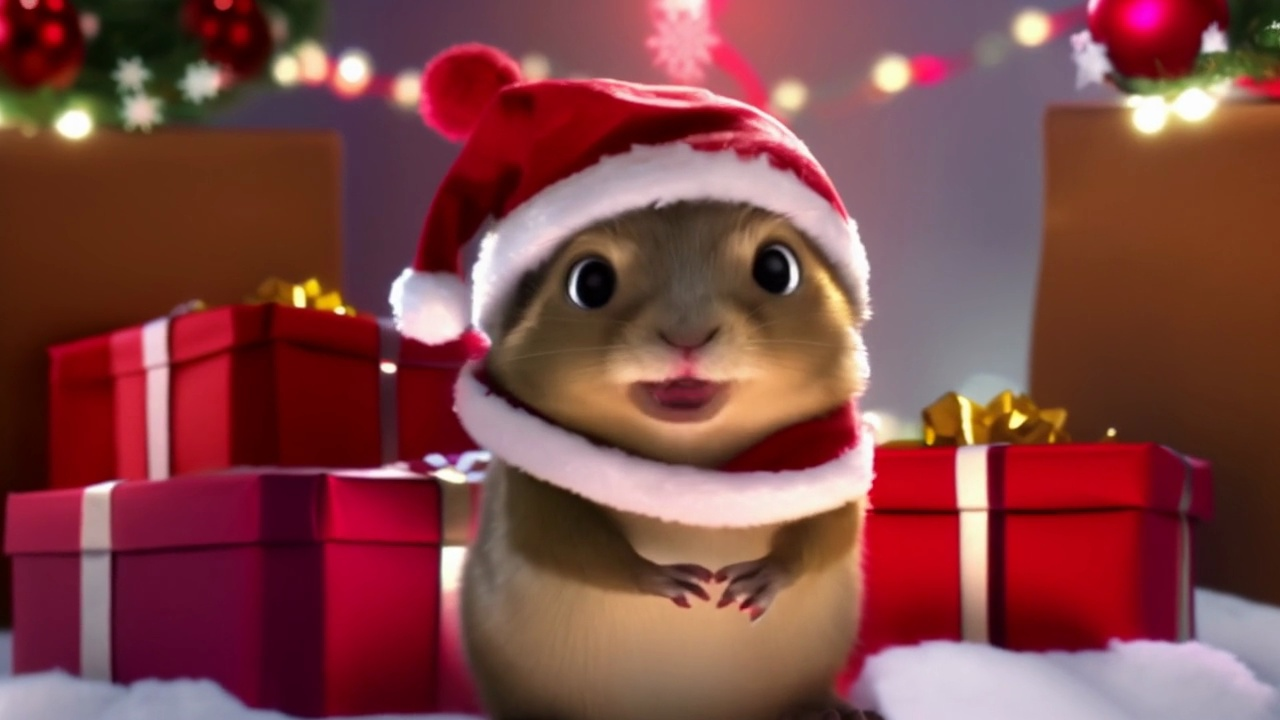

In [3]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [4]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

"Get into the holiday spirit with our heartwarming and adorable video featuring a cheerful animated chipmunk dressed in a festive Christmas hat! 🎅🎄 Join our little furry friend as it explores a magical winter wonderland of glistening snow and beautifully wrapped gifts, all set to the merry tunes of holiday cheer. This enchanting video is perfect for sharing the joy of the season with family and friends, young and old alike! 🎁✨ #ChristmasMagic #FestiveFun #HolidayCheer"


In [5]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video. Create a short voiceover script in the style of David Attenborough. Only include the narration.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::60]),
        ],
    },
]
params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 500,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

In the heart of winter's embrace, under a canopy of twinkling lights, we find a creature of extraordinary charm. Adorned in a festive cap, this tiny being captivates us with eyes full of wonder, reflecting the joyous spirit that envelops the season. As it nestles amongst the parcels wrapped in bright hues and ornate bows, it becomes not just an observer of our cherished traditions, but a whimsical symbol of the generosity and warmth that flourish at this time of year. Indeed, the magic of the holiday season is encapsulated in this miniature envoy of merriment – a delightful reminder of the simple pleasures and shared moments that make this period so enchanting.


In [2]:
from openai import OpenAI
client = OpenAI()

input_text = """
Once upon a time, in a peaceful snowy village, the animals prepared for the quietest Christmas ever as Santa announced he needed to rest that year. Ricky the Raccoon, who loved Christmas more than anything, stumbled upon a forgotten Santa suit and had a brilliant idea.

Dressing up as Santa, Ricky decided to bring the Christmas spirit to the village himself. At first, he was clumsy and the gifts he brought were quite unusual - acorns, shiny stones, and feathers. But his determination was infectious, and soon the whole village was abuzz with excitement.

The animals gathered in the market, sharing food, decorations, and the peculiar gifts Ricky had given them. Laughter and chatter filled the air, brighter than the Christmas lights. The villagers realized that even without the real Santa, they could make their own joy and create a Christmas filled with love and community spirit.

And so, thanks to Ricky, the village had the most unforgettable Christmas, learning that the true spirit of the season comes from togetherness and the happiness we give to others. Ricky the Raccoon had not only saved Christmas but had also brought everyone closer together.
"""

response = client.audio.speech.create(
    model="tts-1-hd",
    voice="nova",
    input=input_text,
)

response.stream_to_file("nova_hd_output.mp3")